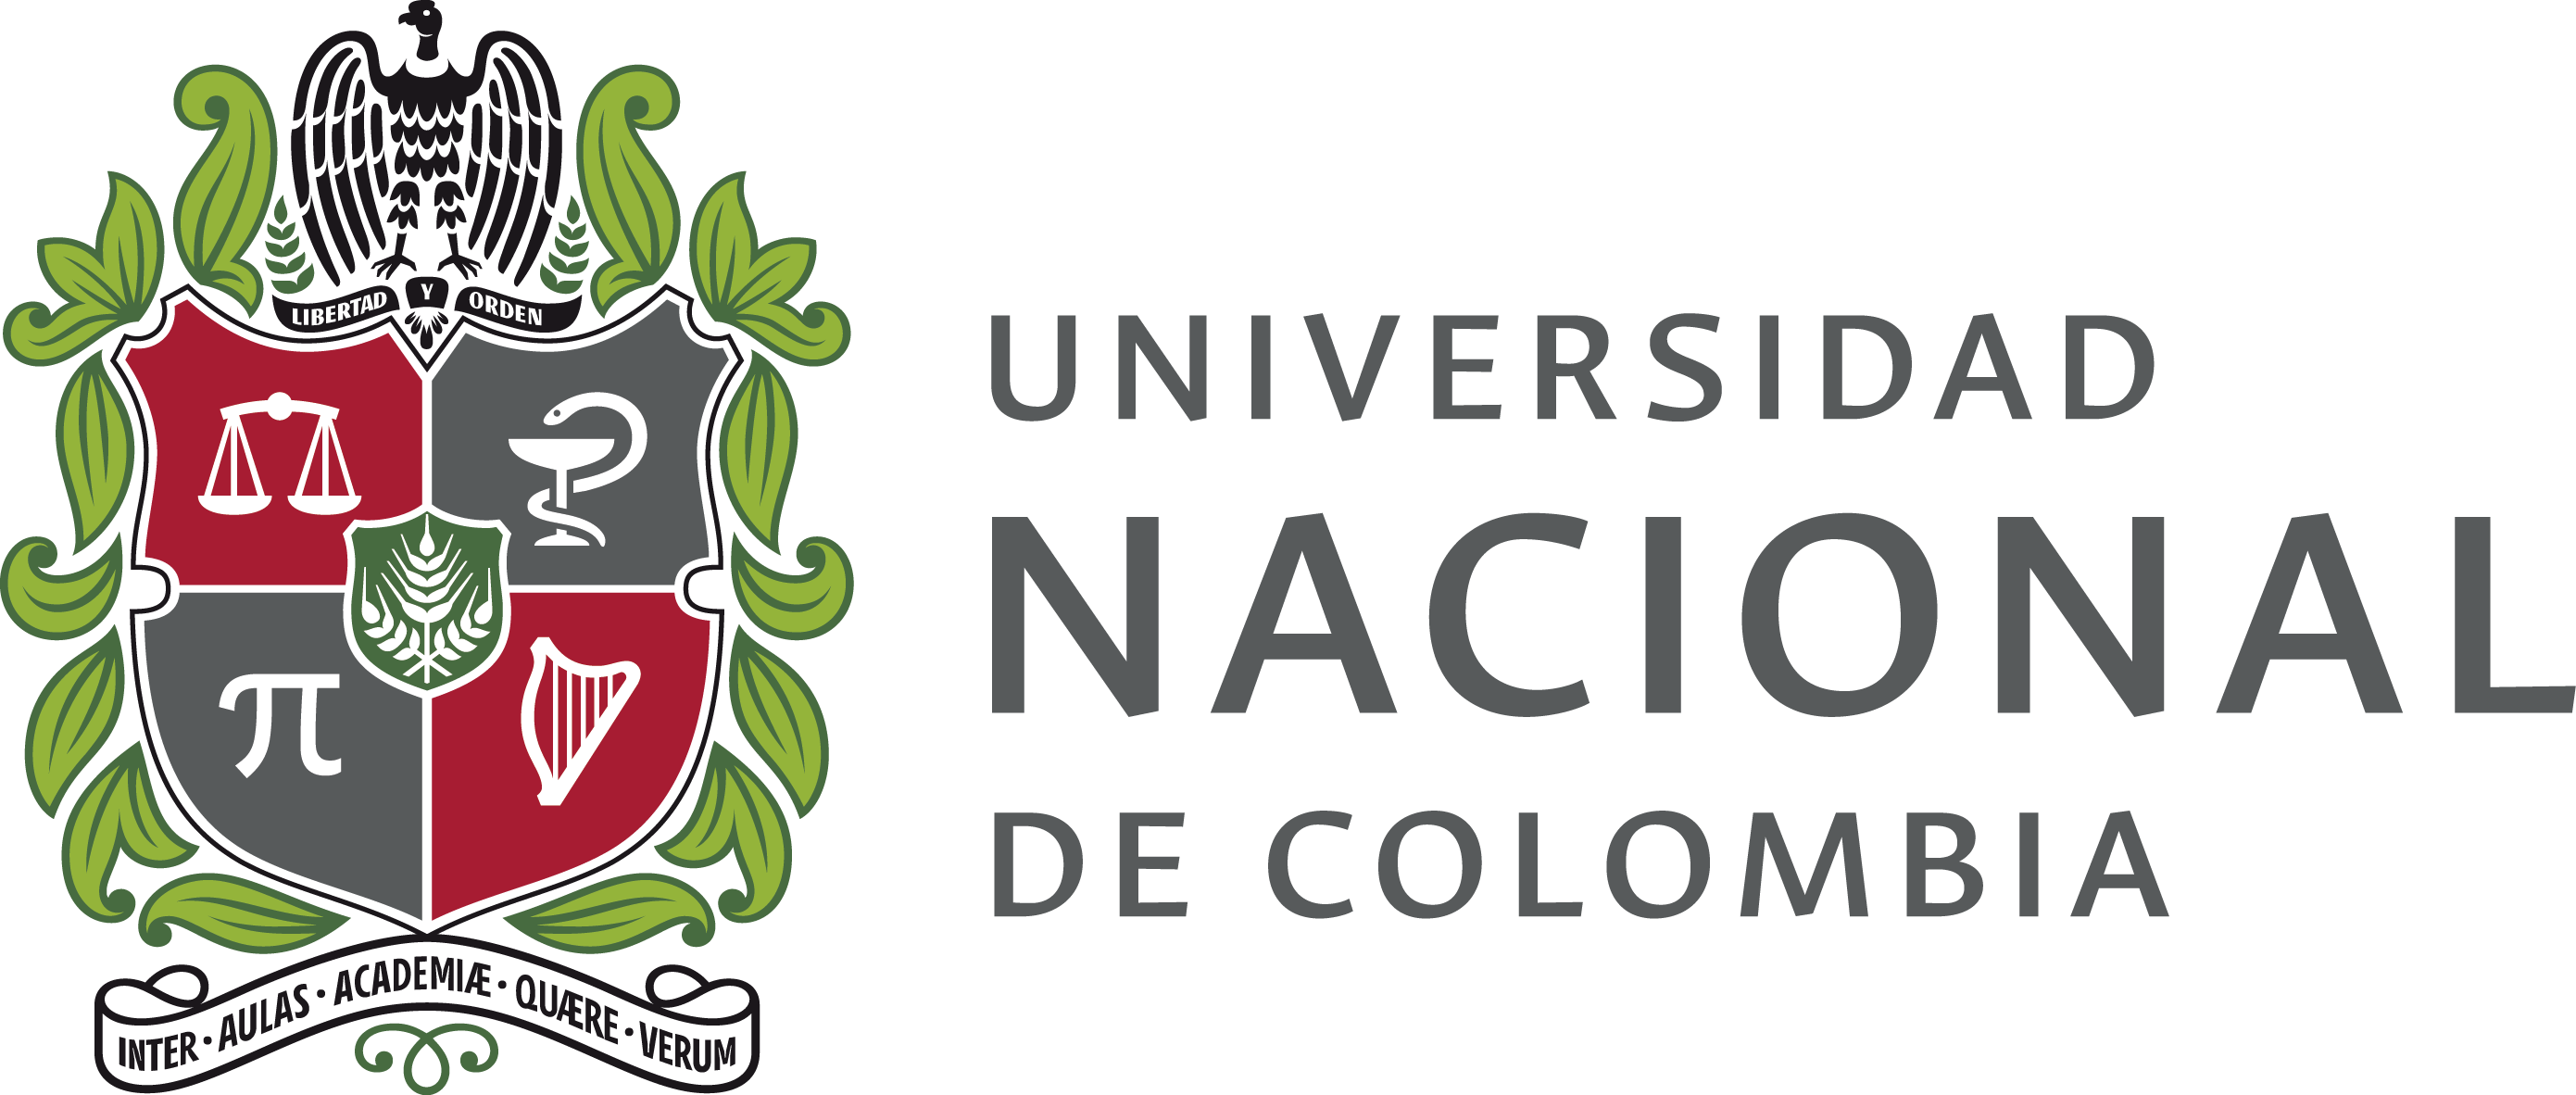
### **Universidad Nacional de Colombia sede Manizales**
#### Facultad de ingeniería y arquitectura
#### Departamento de ingeniería eléctrica, electrónica y computación
#### *Procesamiento digital de imágenes*

#### Profesor: Lucas Iturriago

## OpenCV

### 4.1 ¿Qué es OpenCV?

#### Introducción

**OpenCV (Open Source Computer Vision Library)** es una biblioteca de código abierto enfocada en visión por computador y procesamiento digital de imágenes.
Se utiliza en aplicaciones como:

* Reconocimiento facial.
* Vehículos autónomos.
* Realidad aumentada.
* Análisis de imágenes médicas.
* Robótica.

#### Características principales

* Es **multiplataforma** (Windows, Linux, macOS, Android, iOS).
* Está escrita en **C/C++** pero tiene enlaces para **Python**, **Java** y otros lenguajes.
* Soporta procesamiento en **tiempo real**.
* Incluye más de **2500 algoritmos optimizados**.
* Se integra fácilmente con **NumPy**, lo que la hace ideal para usar en entornos de ciencia de datos.

---

#### Instalación en Python

En Colab no siempre está instalada la última versión de OpenCV, así que podemos hacerlo así:

```python
!pip install opencv-python opencv-python-headless
```

---

#### Importación básica

In [8]:
import cv2
import numpy as np

print("Versión de OpenCV:", cv2.__version__)

Versión de OpenCV: 4.12.0


### 4.2 Lectura, visualización y guardado de imágenes

#### Lectura de imágenes (`cv2.imread`)

OpenCV usa por defecto el formato **BGR** (no RGB como Matplotlib).

Para usar propias imágenes en Colab, se pueden subir con

In [9]:
sample_dir = '/home/javastral/GIT/ComputerVision-2025-2/manizales.jpg'

<class 'numpy.ndarray'>
(650, 1000, 3)


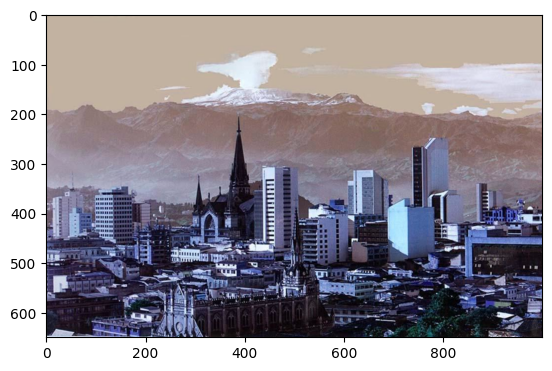

In [10]:
import matplotlib.pyplot as plt

# Cargar imagen desde archivo
img = cv2.imread(sample_dir)   # ruta de la imagen
print(type(img))
print(img.shape)  # (alto, ancho, canales)

plt.imshow(img)  # Mostrar la imagen

#### Modos de lectura

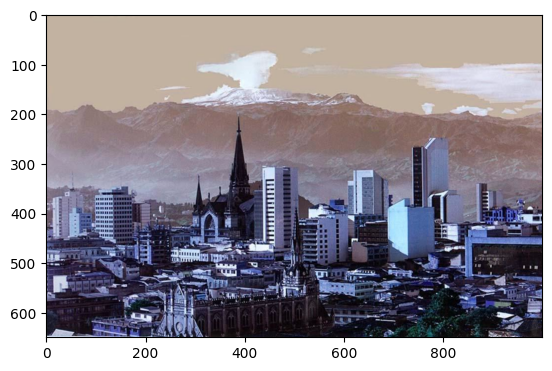

In [11]:
# Escala de grises
img_gray = cv2.imread(sample_dir, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

# Cargar con transparencia (si existe canal alfa)
img_unchanged = cv2.imread(sample_dir, cv2.IMREAD_UNCHANGED)
plt.imshow(img_unchanged)

#### Guardado de imágenes (`cv2.imwrite`)

In [12]:
# Guardar en disco
cv2.imwrite("output_gray.jpg", img_gray)

True

### 4.3 Escala de grises y redimensionamiento

#### Conversión a escala de grises

En OpenCV, se usa `cv2.cvtColor` para cambiar espacios de color.

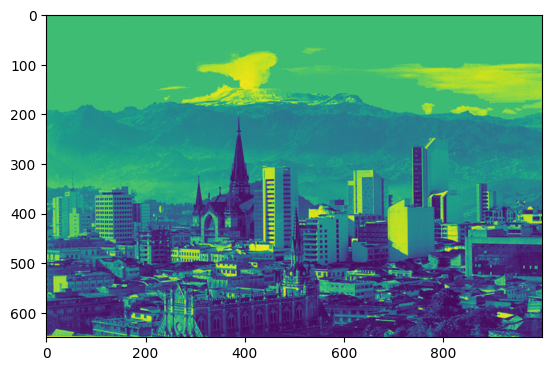

In [13]:
# Cargar imagen en color
img = cv2.imread(sample_dir)

# Convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar resultados
plt.imshow(img)       # Imagen original en BGR
plt.imshow(img_gray)  # Imagen en escala de grises

#### Redimensionamiento de imágenes (`cv2.resize`)

Puedes escalar la imagen indicando un **factor** o un **tamaño exacto**.

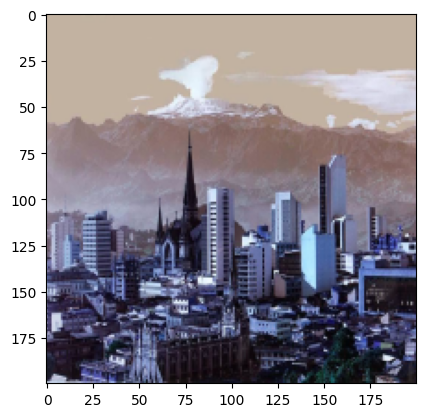

In [14]:
# Redimensionar con factores de escala (50% de tamaño)
img_small = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Redimensionar a tamaño exacto (200x200 píxeles)
img_resized = cv2.resize(img, (200, 200), interpolation=cv2.INTER_AREA)

# Mostrar resultados
plt.imshow(img_small)
plt.imshow(img_resized)

---
#### Parámetros de interpolación más usados

* `cv2.INTER_NEAREST`: más rápido, menos calidad.
* `cv2.INTER_LINEAR`: por defecto, buena calidad en reducciones.
* `cv2.INTER_CUBIC`: más lento, mejor para ampliaciones.
* `cv2.INTER_AREA`: recomendado para reducir imágenes.

---

### 4.4 Operaciones básicas de dibujo

#### ¿Qué son las operaciones básicas de dibujo?

Son funciones que permiten **dibujar directamente sobre imágenes**: líneas, rectángulos, círculos, elipses, polígonos y texto.
Se usan mucho en **anotación de imágenes**, para resaltar regiones de interés (ROIs), dibujar bounding boxes en visión por computador, o agregar información visual.

Todas estas funciones se aplican **sobre una imagen existente**, modificándola en el acto.

#### Línea (`cv2.line`)

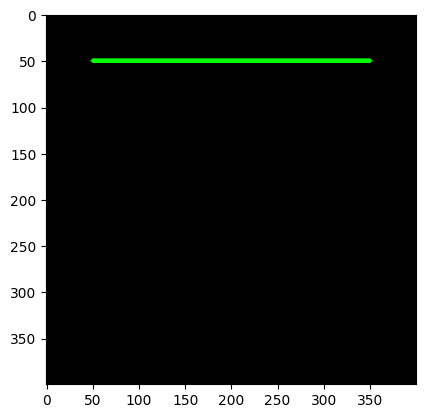

In [15]:
# Crear imagen en negro
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Dibujar línea (imagen, punto inicial, punto final, color BGR, grosor)
cv2.line(img, (50, 50), (350, 50), (0, 255, 0), 3)

plt.imshow(img)

#### Rectángulo (`cv2.rectangle`)

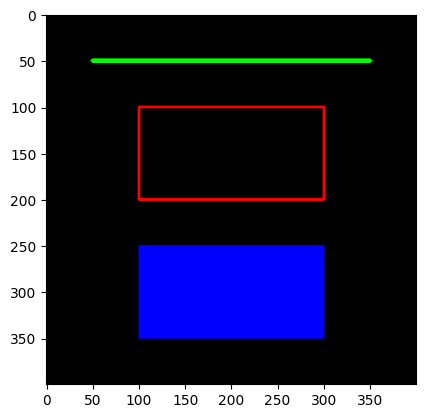

In [16]:
# Copia de la imagen negra
img_rect = img.copy()

# Rectángulo (imagen, esquina superior izq, esquina inferior der, color, grosor)
cv2.rectangle(img_rect, (100, 100), (300, 200), (255, 0, 0), 2)

# Rectángulo relleno (grosor = -1)
cv2.rectangle(img_rect, (100, 250), (300, 350), (0, 0, 255), -1)

plt.imshow(img_rect)

#### Círculo (`cv2.circle`)

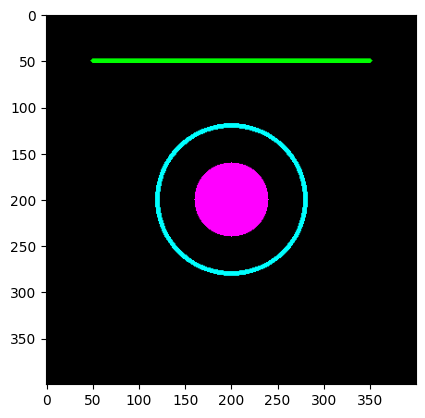

In [17]:
# Copia
img_circle = img.copy()

# Círculo (imagen, centro, radio, color, grosor)
cv2.circle(img_circle, (200, 200), 80, (0, 255, 255), 4)

# Círculo relleno
cv2.circle(img_circle, (200, 200), 40, (255, 0, 255), -1)

plt.imshow(img_circle)

#### Elipse (`cv2.ellipse`)

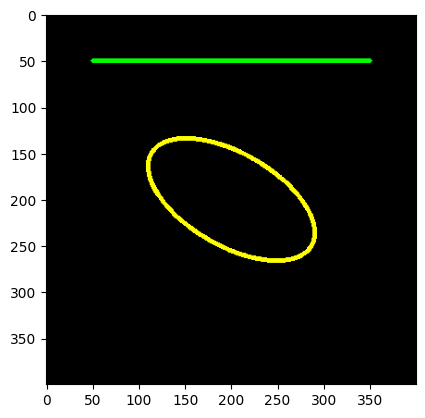

In [18]:
img_ellipse = img.copy()

# Elipse (imagen, centro, ejes (mayor, menor), ángulo, inicio, fin, color, grosor)
cv2.ellipse(img_ellipse, (200, 200), (100, 50), 30, 0, 360, (255, 255, 0), 3)

plt.imshow(img_ellipse)

#### Polígono (`cv2.polylines`)

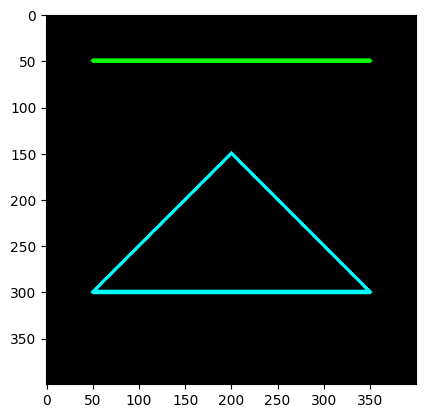

In [19]:
img_poly = img.copy()

# Definir puntos de un polígono
pts = np.array([[50,300], [200,150], [350,300]], np.int32)
pts = pts.reshape((-1,1,2))

# Dibujar polígono (imagen, [puntos], cerrado?, color, grosor)
cv2.polylines(img_poly, [pts], isClosed=True, color=(0, 255, 255), thickness=3)

plt.imshow(img_poly)

#### Texto (`cv2.putText`)

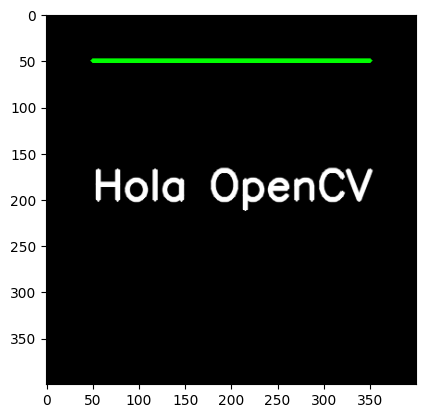

In [20]:
img_text = img.copy()

# Texto (imagen, texto, posición inicial, fuente, escala, color, grosor, tipo de línea)
cv2.putText(img_text, "Hola OpenCV", (50, 200),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3, cv2.LINE_AA)

plt.imshow(img_text)

## Espacios de color

### 5.1 ¿Qué es un espacio de color?

Un **espacio de color** es una forma de representar los colores en un sistema de coordenadas.
Cada espacio define **cómo se combinan los canales** (por ejemplo, Rojo, Verde y Azul) para describir cualquier color visible.

En procesamiento de imágenes, los espacios de color son fundamentales porque:

* Permiten **resaltar características** según la tarea (ej. segmentar un objeto rojo en HSV es más fácil que en RGB).
* Afectan la forma en que los algoritmos interpretan la **intensidad, brillo y saturación**.
* Facilitan **conversiones** para distintos dispositivos (pantallas, cámaras, impresión).

### 5.2 BGR (Blue, Green, Red)

OpenCV usa por defecto el orden **BGR** (Blue, Green, Red). Es igual a RGB en contenido de color, pero con los canales en orden invertido. Internamente muchas funciones y muestras de ejemplo asumen BGR, por eso al mezclar librerías (Matplotlib, PIL) hay que convertir explícitamente.

#### Conversión y manipulación

In [21]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread(sample_dir)

Convertir BGR → RGB (forma "oficial"):

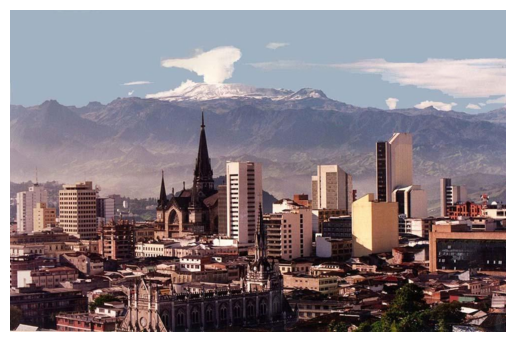

In [22]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

Convertir BGR → RGB (forma por slicing):

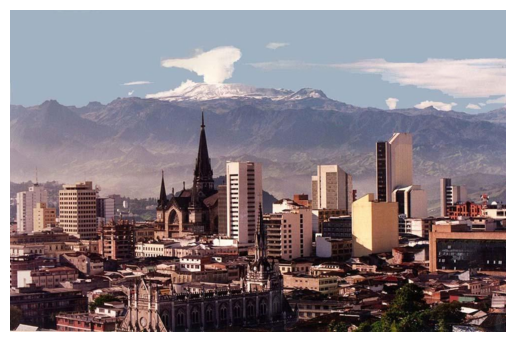

In [23]:
img_rgb_slice = img_bgr[:, :, ::-1]
plt.imshow(img_rgb_slice)
plt.axis("off")
plt.show()

Separar canales B, G, R y visualizar cada canal como imagen en escala de grises y como canal coloreado:

In [24]:
b,g,r = cv2.split(img_bgr)
zeros = np.zeros_like(b)
img_b = cv2.merge([b, zeros, zeros])
img_g = cv2.merge([zeros, g, zeros])
img_r = cv2.merge([zeros, zeros, r])
cv2_imshow(img_b)
cv2_imshow(img_g)
cv2_imshow(img_r)

NameError: name 'cv2_imshow' is not defined

Ajustar brillo/contraste con `convertScaleAbs`:

In [ ]:
img_bc = cv2.convertScaleAbs(img_bgr, alpha=1.2, beta=30)
cv2_imshow(img_bc)

### 5.3 RGB (Red, Green, Blue)

**RGB** es el estándar en gráficos y visualización (pantallas, Matplotlib, PIL). Muchos recursos, modelos y ejemplos están en RGB. Cuando trabajas con OpenCV, recuerda convertir BGR → RGB antes de mostrar con Matplotlib o PIL.


Convertir y mostrar. Para guardar una imagen en formato que espera RGB (por ejemplo, usar PIL o mostrar con Matplotlib), toca convertir:

In [ ]:
from PIL import Image
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)
img_pil.save("output_rgb.png")

Para manipular canales en RGB (por ejemplo para augmentations fáciles), se puede usar `img_rgb[..., 0]` para R, etc.

### 5.4 Grayscale (escala de grises)

Una imagen en escala de grises tiene un único canal que representa la **intensidad** (luminancia). Es la representación más simple y útil cuando la información de color no es necesaria (detección de bordes, thresholding, muchos algoritmos clásicos).

#### Conversión y operaciones comunes

In [ ]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

Equalización de histograma para mejorar contraste:

In [ ]:
img_eq = cv2.equalizeHist(img_gray)
cv2_imshow(img_eq)

Aplicar detección de bordes (ejemplo clásico que funciona mejor sobre gris):

In [ ]:
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
edges = cv2.Canny(img_blur, 50, 150)
cv2_imshow(edges)

### 5.5 HSV (Hue, Saturation, Value)

HSV separa la información de **tono (Hue)**, **saturación (Saturation)** y **valor/brillo (Value)**. Es muy útil para tareas donde interesa el color independiente de la iluminación—por eso es la elección habitual para **segmentación por color**.

Importante: en OpenCV el rango es distinto a muchas referencias:

* H: 0 … 179 (no 0–360)
* S: 0 … 255
* V: 0 … 255

#### Conversión y manipulación

In [ ]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)
cv2_imshow(h)
cv2_imshow(s)
cv2_imshow(v)

Ejemplo de segmentación por color (rojo):

In [ ]:
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([179, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = mask1 | mask2
res_red = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_red)
cv2_imshow(mask_red)
cv2_imshow(res_red)

Aumentar saturación o brillo (manipulando canales HSV):

In [ ]:
img_hsv2 = img_hsv.copy()
img_hsv2[:,:,1] = np.clip(img_hsv2[:,:,1].astype('float32') * 1.2, 0, 255).astype('uint8')
img_sat_boost = cv2.cvtColor(img_hsv2, cv2.COLOR_HSV2BGR)
cv2_imshow(img_sat_boost)

### 5.6 LAB (L* a* b*)

El espacio **CIE L*a*b*** es perceptualmente más uniforme: `L*` es luminosidad, `a*` canal verde–rojo, `b*` canal azul–amarillo. Es muy útil cuando quieres trabajar con separación entre luminancia y color o aplicar mejoras de contraste sin alterar colores de forma no deseada.

#### Conversión y uso frecuente (ej.: CLAHE)

In [ ]:
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(img_lab)
cv2_imshow(l)
cv2_imshow(a)
cv2_imshow(b)

Aplicar CLAHE sobre canal L para mejorar contraste sin distorsionar color:

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
img_lab_clahe = cv2.merge([l_clahe, a, b])
img_clahe = cv2.cvtColor(img_lab_clahe, cv2.COLOR_LAB2BGR)
cv2_imshow(img_clahe)

Uso en comparación de colores y normalización: LAB se usa mucho para medir distancias de color (euclídea en a,b) y para tareas de corrección de color e iluminación.

## Segmentación clásica

Antes de la era del deep learning, la **segmentación de imágenes** se realizaba con métodos matemáticos y transformaciones en píxeles.
El objetivo: **dividir la imagen en regiones con significado** (ejemplo: fondo vs objeto).

Se le llama “clásica” porque no involucra redes neuronales, sino operaciones **determinísticas** basadas en color, intensidad o bordes.

### 6.1 Umbralización global (Thresholding)

La **umbralización global** divide la imagen en dos clases de píxeles:

* Valores **menores al umbral** → fondo (0, negro).
* Valores **mayores o iguales** → objeto (255, blanco).

Es el método más simple de segmentación. Funciona bien con imágenes de **contraste claro y fondo uniforme**.

#### Implementación

In [ ]:
# Cargar imagen en escala de grises
img_gray = cv2.imread(sample_dir, cv2.IMREAD_GRAYSCALE)

# Umbral fijo (t = 127)
_, th_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(img_gray)
cv2_imshow(th_bin)

### 6.2 Umbralización adaptativa

Cuando la iluminación no es uniforme, el umbral fijo falla.
La **umbralización adaptativa** calcula un umbral distinto para cada región de la imagen, mejorando resultados en presencia de **sombras o gradientes de luz**.

#### Implementación

In [ ]:
th_adapt = cv2.adaptiveThreshold(img_gray, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

cv2_imshow(th_adapt)

### 6.3 Umbralización de Otsu

El **método de Otsu** encuentra automáticamente el umbral que mejor separa los píxeles en dos grupos (mínima varianza intra-clase).
No requiere que el usuario elija manualmente `t`.

#### Implementación

In [ ]:
_, th_otsu = cv2.threshold(img_gray, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(th_otsu)

### 6.4 Segmentación por color en HSV

El espacio **HSV (Hue, Saturation, Value)** permite separar colores más fácilmente que RGB o BGR.
Ejemplo: aislar todos los píxeles de un rango de azul.

#### Implementación

In [ ]:
img_bgr = cv2.imread(sample_dir)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Rango de azul en HSV
lower_blue = (100, 150, 0)
upper_blue = (140, 255, 255)

mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)
res_blue = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_blue)

cv2_imshow(mask_blue)   # máscara binaria
cv2_imshow(res_blue)    # objeto segmentado

### 6.5 Detección de bordes (Canny)

El **algoritmo de Canny** detecta bordes a partir de cambios abruptos de intensidad.
Se basa en gradientes y aplica filtros para reducir ruido.

#### Implementación

In [ ]:
edges = cv2.Canny(img_gray, 100, 200)

cv2_imshow(img_gray)
cv2_imshow(edges)

### 6.6 Contornos

Una vez tenemos una máscara binaria (por ejemplo, con threshold u Otsu), podemos **encontrar y dibujar contornos** de los objetos.
Esto es útil para medir áreas, perímetros o detectar formas.

#### Implementación

In [ ]:
# Contornos a partir de la binarización global
_, th_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(th_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos sobre la imagen original
img_contours = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

cv2_imshow(img_contours)